In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\katey\Desktop\Final Unit CareerFoundry\6.1\citi_61.csv"

In [4]:
df_all = pd.read_csv(os.path.join(path, r"C:\Users\katey\Desktop\Final Unit CareerFoundry\6.1\citi_61.csv"))

In [5]:
df_all.shape

(42993, 17)

In [6]:
df_all.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,female,9/9/2013 18:18,9/9/2013 18:35
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,male,9/12/2013 18:38,9/12/2013 18:48
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,male,9/18/2013 19:44,9/18/2013 19:50
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,female,9/28/2013 11:54,9/28/2013 12:03
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,female,9/27/2013 22:01,9/27/2013 22:08


In [68]:
df_all = df_all.drop(columns=['day_of_week','start_station_name','end_station_name', 'subscriber', 'gender','birth_year']) #I accidently ran this twice. This error did not appear before. I think it was because I was further in the code when I accidentlly ran it.

KeyError: "['day_of_week', 'start_station_name', 'end_station_name', 'subscriber', 'gender', 'birth_year'] not found in axis"

In [10]:
df_all.head()

,Unnamed: 0,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,start_of_ride,end_of_ride
0,0,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,9/9/2013 18:18,9/9/2013 18:35
1,1,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,9/12/2013 18:38,9/12/2013 18:48
2,2,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,9/18/2013 19:44,9/18/2013 19:50
3,3,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,9/28/2013 11:54,9/28/2013 12:03
4,5,22,293,40.730287,-73.990765,432,40.726218,-73.983799,427,9/27/2013 22:01,9/27/2013 22:08


In [11]:
df_all = df_all.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude'])

In [12]:
df_all.isnull().sum()

Unnamed: 0          0
start_hour          0
start_station_id    0
end_station_id      0
trip_duration       0
start_of_ride       0
end_of_ride         0
dtype: int64

In [15]:
df_all['start_hour'] = (df_all['start_hour'] - df_all['start_hour'].mean()) / df_all['start_hour'].std()

In [16]:
df_all['trip_duration'] = (df_all['trip_duration'] - df_all['trip_duration'].mean()) / df_all['trip_duration'].std()

In [18]:
df_all.head()

,Unnamed: 0,start_hour,start_station_id,end_station_id,trip_duration,start_of_ride,end_of_ride
0,0,0.793589,523,334,0.425065,9/9/2013 18:18,9/9/2013 18:35
1,1,0.793589,257,236,-0.362029,9/12/2013 18:38,9/12/2013 18:48
2,2,0.996310,479,513,-0.782322,9/18/2013 19:44,9/18/2013 19:50
3,3,-0.625458,527,441,-0.400238,9/28/2013 11:54,9/28/2013 12:03
4,5,1.604472,293,432,-0.656234,9/27/2013 22:01,9/27/2013 22:08


In [42]:
num_cl = range(1, 10)

In [43]:
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [48]:
df_clean.columns

Index(['Unnamed: 0', 'start_hour', 'start_station_id', 'end_station_id',
       'trip_duration', 'start_of_ride', 'end_of_ride'],
      dtype='object')

In [56]:
sub = df_all[['start_hour', 'start_station_id', 'end_station_id', 'trip_duration']]

In [57]:
num_cl = range(1, 10)

In [58]:
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [59]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\katey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\katey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-9756449237.320173,
 -5481311121.233358,
 -1648567601.3473716,
 -1231671742.3289154,
 -979121964.9797044,
 -751526903.5634694,
 -592071827.086314,
 -454497295.55628365,
 -355850650.34899783]

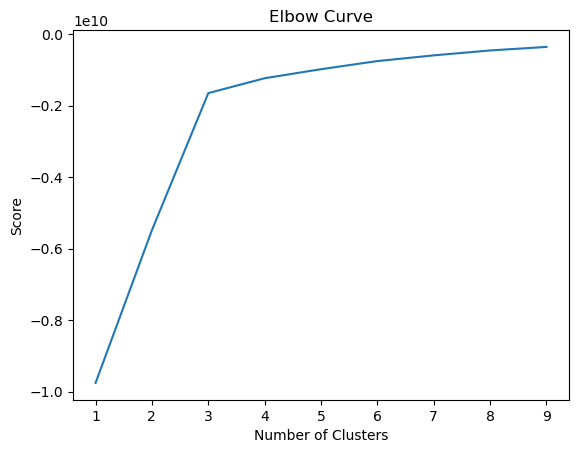

In [62]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will be choosing the number 3. The values jump rapidly from 1-3 then platues/slowly rises after 3 which indicated the optimal count for clusters is 3.

In [63]:
kmeans = KMeans(n_clusters = 3)

In [78]:
kmeans.fit(sub)

C:\Users\katey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [70]:
df_all.head()

,Unnamed: 0,start_hour,start_station_id,end_station_id,trip_duration,start_of_ride,end_of_ride
0,0,0.793589,523,334,0.425065,9/9/2013 18:18,9/9/2013 18:35
1,1,0.793589,257,236,-0.362029,9/12/2013 18:38,9/12/2013 18:48
2,2,0.996310,479,513,-0.782322,9/18/2013 19:44,9/18/2013 19:50
3,3,-0.625458,527,441,-0.400238,9/28/2013 11:54,9/28/2013 12:03
4,5,1.604472,293,432,-0.656234,9/27/2013 22:01,9/27/2013 22:08


Text(0, 0.5, 'trip_duration')

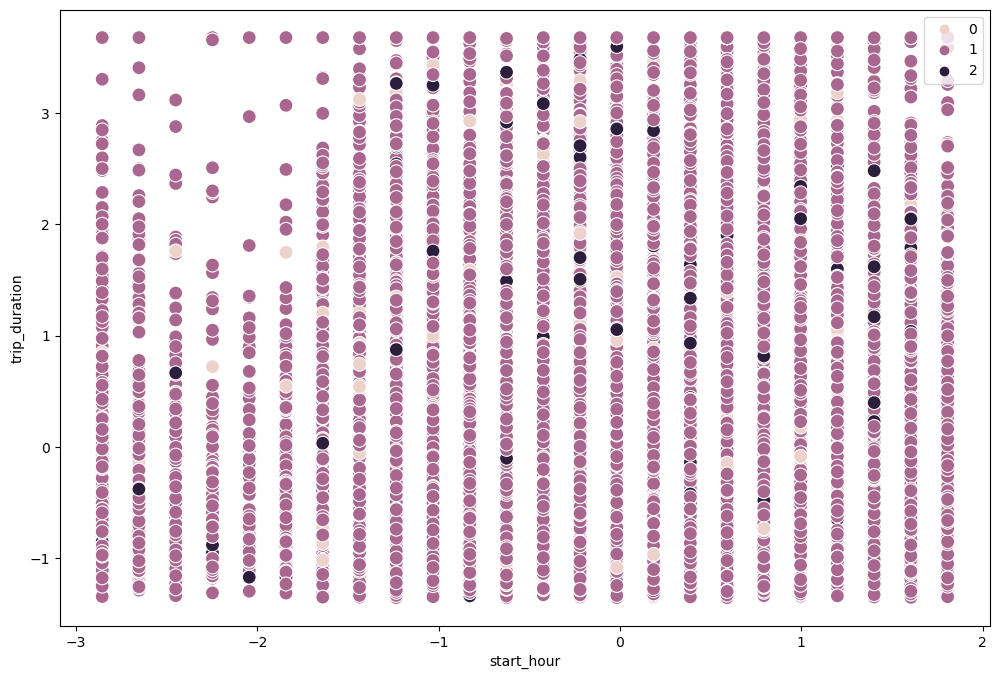

In [79]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all['start_hour'], y=df_all['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('start_hour') 
plt.ylabel('trip_duration') 

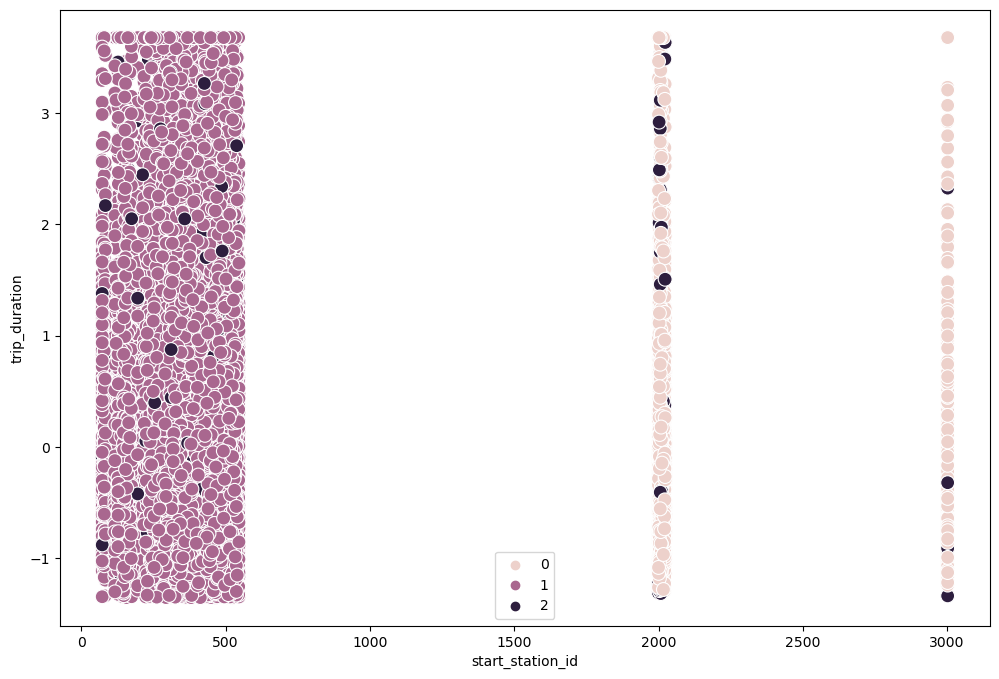

In [80]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['start_station_id'], y = sub['trip_duration'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('start_station_id')
plt.ylabel('trip_duration')
plt.show()

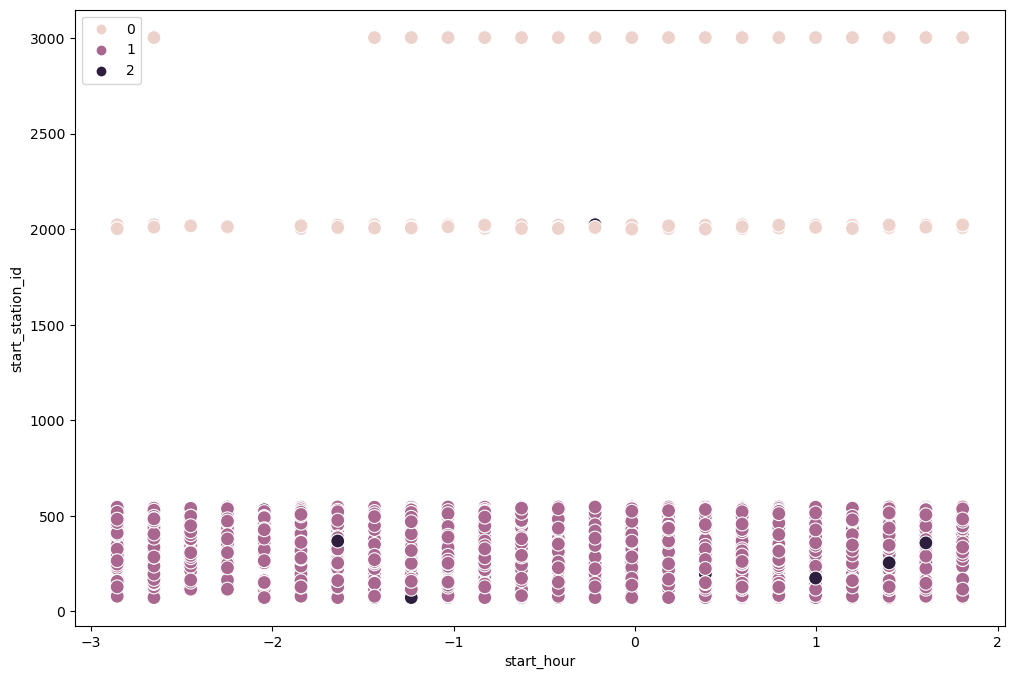

In [81]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['start_hour'], y = sub['start_station_id'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('start_hour')
plt.ylabel('start_station_id')
plt.show()

The findings suggest that there are certain stations and times that are the most popular.

In [63]:
df_all.groupby('cluster').agg({'start_hour':['mean','median'],
            'trip_duration':['mean','median']})

Based on the statistics it appears that there is in fact a correlation between the stops and the number of customers using them. I would like to further investigate this and if there is a particular day or hour that is more popular and has a longer trip duration.